In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as numpy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [20]:
# bring in BA_reviews_v2.csv as a workable DataFrame

brit_air_df = pd.read_csv("data/BA_reviews_v2.csv", index_col= 0)
brit_air_df.head()

,overall_score,reviewer_name,publish_date,review_text,verified,aircraft,traveller_type,seat_type,depart_location,arrival_location,date_flown,seat_comfort_rating,cbn_staff_rating,food_and_bev_rating,inflight_ent_rating,ground_rating,$_value_rating,wifi_conn_rating,recommended
0,1.0,E Gan,2024-01-02,✅ Trip Verified | My son and I flew to Geneva...,1,NaN,Family Leisure,Business Class,Gatwick,Geneva,2023-12-01,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,8.0,S Dayle,2023-12-29,✅ Trip Verified | For the price paid (bought ...,1,A320,Solo Leisure,Business Class,Istanbul,London Heathrow,2023-12-01,1.0,4.0,5.0,1.0,2.0,4.0,NaN,1
2,6.0,S Neale,2023-12-29,✅ Trip Verified | Flight left on time and arr...,1,A320,Solo Leisure,Economy Class,London Heathrow,Istanbul,2023-12-01,3.0,2.0,1.0,1.0,5.0,2.0,NaN,0
3,2.0,Mick Carter,2023-12-27,✅ Trip Verified | Very Poor Business class pr...,1,Boeing 777,Business,Business Class,Gatwick,St Lucia,2023-12-01,1.0,5.0,2.0,2.0,1.0,2.0,2.0,0
4,5.0,Colin Wicks,2023-12-27,Not Verified | This review is for LHR-SYD-LHR....,0,Boeing 777,Couple Leisure,Business Class,Sydney,London Heathrow,2023-12-01,5.0,3.0,1.0,3.0,3.0,3.0,NaN,0


In [21]:
# Understanding the data

brit_air_df.info()

# Thoughts: Need to change publish_date and date_flown to be datetime, can look at it temporally.
# use histograms on ratings to find out distribution.
# find out if correlation between seat_type and recommendations, or seat_comfort, etc.
# create a wordcloud (don't forget to exclude "Trip Verified" or "Not Verified") to visually spot common words, then
# separate by positive and negative reviews.


<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 0 to 3727
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall_score        3723 non-null   float64
 1   reviewer_name        3728 non-null   object 
 2   publish_date         3728 non-null   object 
 3   review_text          3728 non-null   object 
 4   verified             3728 non-null   int64  
 5   aircraft             1940 non-null   object 
 6   traveller_type       2957 non-null   object 
 7   seat_type            3726 non-null   object 
 8   depart_location      2953 non-null   object 
 9   arrival_location     2938 non-null   object 
 10  date_flown           2950 non-null   object 
 11  seat_comfort_rating  3611 non-null   float64
 12  cbn_staff_rating     3599 non-null   float64
 13  food_and_bev_rating  3337 non-null   float64
 14  inflight_ent_rating  2570 non-null   float64
 15  ground_rating        2882 non-null   float6

In [26]:
# Change review_text values to exclude "✅ Trip Verified |" and "Not Verified |"

brit_air_df['review_text'] = brit_air_df['review_text'].str.replace("✅ Trip Verified |","").str.replace("Not Verified |","").str.strip()

brit_air_df['review_text']

0       My son and I flew to Geneva last Sunday for a ...
1       For the price paid (bought during a sale) it w...
2       Flight left on time and arrived over half an h...
3       Very Poor Business class product, BA is not ev...
4       This review is for LHR-SYD-LHR. BA015 and BA01...
                              ...                        
3723    LHR-JFK-LAX-LHR. Check in was ok apart from be...
3724    LHR to HAM. Purser addresses all club passenge...
3725    My son who had worked for British Airways urge...
3726    London City-New York JFK via Shannon on A318 b...
3727    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: review_text, Length: 3728, dtype: object

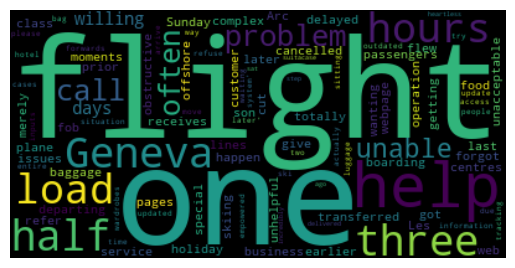

In [29]:
# WordCloud test with one instance.

text = brit_air_df.review_text[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Cool, now for the whole thing

# First, combine all reviews into a fat word clump.

text = " ".join(review for review in brit_air_df.review_text)
print(f"There are \033[1m{len(text):,d}\033[0m words in the 'text' value")

There are 3,314,317 words in the 'text' value


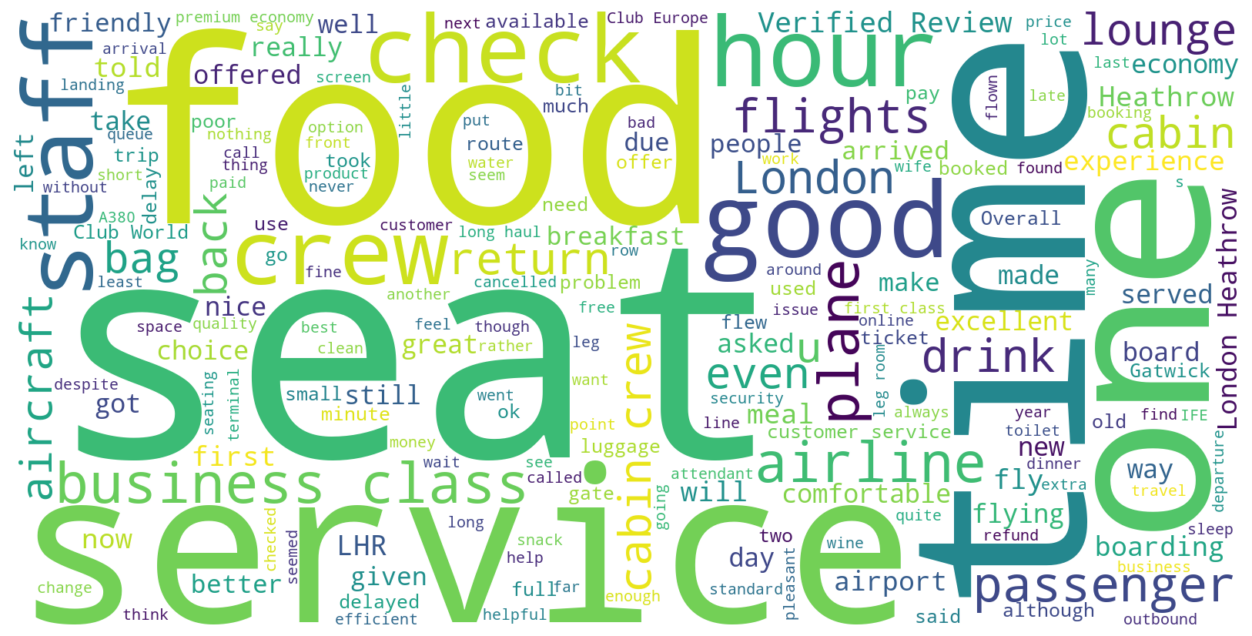

In [59]:
# Next, create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight","British","Airway","Airways","BA"])

#Now, geneerate a wordcloud
wordcloud = WordCloud(stopwords= stopwords, background_color= "white",width= 1600, height= 800).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Findings: "seat", "food", "time" stuck out the most. "service", "crew", "staff" were the next most used. 